# Capstone 2 Project - Russian Troll Groups - Commercial

In the analysis of each troll group, each of the troll groups* will be segmented out and analyzed each individually.  The "troll classes", as defined by Clemson University's Darren Linvill and Patrick Warren in their analysis of the Russian Troll Farm Twitter data.

I will analyze the Troll Groups to explore questions about the nature of the disinformation campaign, such as:
* Did other trolls retweet and amplify troll tweets?
* Can common topics or themes be identified?
* What were the most-used hashtags?
* Did the tweets predominantly support one candidate or political party, or seek to undermine the other?

## Data Dictionary

Header | Definition
-------|---------
`external_author_id` | An author account ID from Twitter 
`author` | The handle sending the tweet
`content` | The text of the tweet
`region` | A region classification, as [determined by Social Studio](https://help.salesforce.com/articleView?   id=000199367&type=1)
`language` | The language of the tweet
`publish_date` | The date and time the tweet was sent
`harvested_date` | The date and time the tweet was collected by Social Studio
`following` | The number of accounts the handle was following at the time of the tweet
`followers` | The number of followers the handle had at the time of the tweet
`updates` | The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes
`post_type` | Indicates if the tweet was a retweet or a quote-tweet
`account_type` | Specific account theme, as coded by Linvill and Warren
`retweet` | A binary indicator of whether or not the tweet is a retweet
`account_category` | General account theme, as coded by Linvill and Warren
`new_june_2018` | A binary indicator of whether the handle was newly listed in June 2018

In [2]:
# import standard libraries
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#import numpy as np
#import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
#get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
# import nltk libraries
from nltk.corpus import stopwords
from nltk import FreqDist
#nltk.download('stopwords') # run one time

In [4]:
# import gensim libraries
from gensim.models.ldamulticore import LdaMulticore
from gensim.test.utils import datapath
from gensim import corpora
from gensim.utils import any2unicode

In [5]:
#suppress pandas future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
# read each troll classification file as 'df', for repurposing code for each class
# nrows=100, 
full_df = pd.read_csv('../data/all_IRAhandle_tweets.csv', parse_dates = ['publish_date'], low_memory=False)
name = 'Right Troll'

In [8]:
full_df['account_category'].unique()

array(['RightTroll', 'NonEnglish', 'Fearmonger', 'LeftTroll', 'Unknown',
       'HashtagGamer', 'NewsFeed', 'Commercial'], dtype=object)

In [9]:
df = full_df[full_df['account_category'] == "Commercial"]

In [10]:
#Explicitly state that DF is a copy of full_df
df.is_copy = True
#df.drop('Unnamed: 0', axis=1, inplace=True)
# drop rows with problematic character encoding
#df.drop([58, 59], axis=0, inplace=True)
#df.head()

In [11]:
df['cleaned'] = df['content'].fillna('').astype(str).map(any2unicode)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Text Preprocessing
* Noise Removal
* Tokenization
* Normalization  
(1) stemming
(2) lemmatization, and 
(3) everything else

### Remove URLs and non-English Characters

In [12]:
def preprocess_text(text):
    '''Remove URLs and Non-English characters, except for @ and #'''
    # remove URL's
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

    # remove symbols excluding the @, # and \s symbol
    text = re.sub(r'[^\w@#\s]', '', text)

    # remove URL's
    text = re.sub('(https://[^\s]+)', '', text)
    text = re.sub('https?://[A-Za-z0-9./]+', '', text)

    # remove URL's
    text = re.sub('http?://[A-Za-z0-9./]+', '', text)

    # lowercase, remove words less than len 2 & remove numbers in tokenized list
    #return [word.lower() for word in text if len(word) > 2 and not word.isdigit() and not word in ignore_words]
    return text

In [13]:
df['cleaned'] = df['cleaned'].apply(preprocess_text)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Hashtag Analysis

In [14]:
# regex to find hashtags
hashtag_re = re.compile("(?:^|\s)[＃#]{1}(\w+)", re.UNICODE)

def extract_hashtags(tweet):
    '''Take in tweet contents from 'cleaned' content, extract hashtags and return cleaned text'''
    hashtags_only = []
    if len(re.findall(hashtag_re, tweet)) > 0:
        hashtags_only.append(re.findall(hashtag_re, tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]

In [15]:
# Create a new column to store hashtags, extract hashtags from 'content'
df['hashtags'] = df['cleaned'].map(extract_hashtags)
df['hashtags'].head(25)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


132225    [0]
132226    [0]
132227    [0]
132228    [0]
132229    [0]
132230    [0]
132231    [0]
132232    [0]
132233    [0]
132234    [0]
132235    [0]
132236    [0]
132237    [0]
132238    [0]
132239    [0]
132240    [0]
132241    [0]
132242    [0]
132243    [0]
132244    [0]
132245    [0]
132246    [0]
132247    [0]
132248    [0]
132249    [0]
Name: hashtags, dtype: object

In [16]:
# remove all hashtags from a tweet
def remove_hashtags(tweet):
    '''After extracting hashtags, take in tweet content and remove hashtags'''
    hashtags_only = []
    if len(re.findall(hashtag_re, tweet)) > 0:
        tweet = re.sub(hashtag_re, "", tweet)
    hashtags_only.append(tweet)
    return hashtags_only[0]

In [17]:
# Clean hashtags fron 'cleaned' content
df['cleaned'] = df['cleaned'].apply(remove_hashtags)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
# create a list of all hashtags
all_hashtags = df['hashtags'].tolist()

# all_hashtags is a list of lists.
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# remove the '0' from the list
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

# cleaned_hashtags list
cleaned_hashtags = remove_values_from_list(cleaned_hashtags, 0)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()
print(hashtag_counts[:25])

0                      120849
TBYG                       43
1                          41
ShesKindaHotVMA            10
KiddyHour                   9
BlackLivesMatter            8
MentalHealthGunGrab         7
4                           6
BringBackOurGirls           6
AdebolaOlomo                6
MIWF                        6
WorthItVMA                  6
The2OfUs_EP                 6
3                           5
_                           5
vote2016                    4
StayHumble                  4
OGofSleezed                 4
doitwonball                 4
uniproblems                 4
Quote                       4
PLoading                    4
wild                        3
hashtag                     3
OVO                         3
dtype: int64


### Get User Mentions

In [19]:
#Regex to get user mentions "@":
twitter_username_re = re.compile("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", re.UNICODE)

def extract_usermentions(tweet):
    '''Take in tweet contents from 'cleaned' col and extract user mentions'''
    mentions_only = []
    if len(re.findall(twitter_username_re, tweet)) > 0:
        mentions_only.append(re.findall(twitter_username_re, tweet))
    else:
        mentions_only.append(["0"])
    return mentions_only[0]

In [20]:
# make a new column to store the extracted mentions
df['mentions'] = df['cleaned'].map(extract_usermentions)
df['mentions'].head(10)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


132225    [0]
132226    [0]
132227    [0]
132228    [0]
132229    [0]
132230    [0]
132231    [0]
132232    [0]
132233    [0]
132234    [0]
Name: mentions, dtype: object

In [21]:
# create a list of all mentions
all_mentions = df['mentions'].tolist()

# all_hashtags is a list of lists.
cleaned_mentions = []
for i in all_mentions:
    for j in i:
            cleaned_mentions.append(j)

# remove the '0' from the list
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

# cleaned_mentions list
cleaned_mentions = remove_values_from_list(cleaned_mentions, 0)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_mentions_series = pd.Series(cleaned_mentions)
mention_counts = cleaned_mentions_series.value_counts()
# remove first element with values of '0'
# mention_counts = del mention_counts[0]
print(mention_counts[:25])

I           6634
Workout     2592
Im          1407
Exercise    1194
My          1142
Approved    1076
That        1035
0            827
The          810
Just         767
Good         729
You          712
This         689
Its          641
When         638
Need         529
So           499
What         461
A            460
Why          433
Great        427
How          397
Time         368
No           361
If           351
dtype: int64


In [22]:
# remove all mentions from a tweet
def remove_mentions(tweet):
    '''Take tweet content and remove @mentions from it'''
    mentions_only = []
    if len(re.findall("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", tweet)) > 0:
        tweet = re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", "", tweet)
    mentions_only.append(tweet)
    return mentions_only[0]

In [23]:
#create list of content with no hashtags
df['cleaned'] = df['cleaned'].apply(remove_mentions)

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
# remove unwanted characters, numbers and symbols from the remaining content
#df['cleaned'] = df['cleaned'].str.replace("[^a-zA-Z#]", " ")

### Create dataframes for the troll classifications
Create dataframes for each troll classification, for easier size to work with.

In [25]:
#right_troll = df.loc[df['account_category'] == 'RightTroll']
#nonenglish = df.loc[df['account_category'] == 'NonEnglish']
#fearmonger = df.loc[df['account_category'] == 'Fearmonger']
#left_troll = df.loc[df['account_category'] == 'LeftTroll']
#hashtagamer = df.loc[df['account_category'] == 'HashtagGamer']
#newsfeed = df.loc[df['account_category'] == 'NewsFeed']
#commercial = df.loc[df['account_category'] == 'Commercial']

In [26]:
#right_troll.to_csv("../data/right_troll.csv")
#nonenglish.to_csv("../data/nonenglish.csv")
#fearmonger.to_csv("../data/fearmonger.csv")
#left_troll.to_csv("../data/left_troll.csv")
#hashtagamer.to_csv("../data/hashtagamer.csv")
#newsfeed.to_csv("../data/newsfeed.csv")
#commercial.to_csv("../data/commercial.csv")

## Remove stopwords
Remove words < 3 letters, convert to lower case

In [27]:
df.cleaned.head()

132225                                         Guide to Writing Research Papers in APA Style   
132226                                                Why Classroom Allergies Were The Worst   
132227    Dont come to class next week I am going to be sick c Greatest College Professor Ever 
132228    Dont come to class next week I am going to be sick c Greatest College Professor Ever 
132229                                              15 Idiots On Facebook Getting Called Out   
Name: cleaned, dtype: object

In [28]:
# remove short words (length < 3)
df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# transform to lower-case
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#train['tweet'].head()

#stop = set(stopwords.words('english'))
stop = stopwords.words('english')

#extend/add to stopwords - words that are commonly occuring but add no meaning
#stopword_list += ['http', 'https', 'âµã', 'â½ã', 'â²ã', 'âºã', 'â¼ã', 'âµ']
newStop = ['you','get', 'amp', 'one', 'new']
stop.extend(newStop)

df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['cleaned'].head()

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

132225                                 guide writing research papers apa style
132226                                               classroom allergies worst
132227    dont come class next week going sick greatest college professor ever
132228    dont come class next week going sick greatest college professor ever
132229                                          idiots facebook getting called
Name: cleaned, dtype: object

In [29]:
#convert 'cleaned' Series to a list
content = df['cleaned'].tolist()
#content[:50]

### Re-Check Fequency Distribution
Re-check the word frequency distribution after doing some cleaning of the text.

In [30]:
# function to plot most frequent terms
def freq_words(x, terms = 20):
    ''' Take in a list of content, split into individual words, count occurrences, list 20 highest occurring words'''
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms)
    return d

In [31]:
counts = freq_words(content, 20)
print(counts)

           word  count
12270   workout  41380
5576   exercise  13678
12240    weight   9167
1085       lose   6810
79         need   4525
132        good   4487
915      stocks   3254
1432    fitness   2980
12245      diet   2852
140       today   2823
2458      loans   2416
60         like   2267
295        time   2253
7015        fat   2218
3920       loss   2170
5682     payday   2158
9          dont   1959
46          day   1954
1486    morning   1917
5015        gym   1875


### Plot most frequently occurring words 

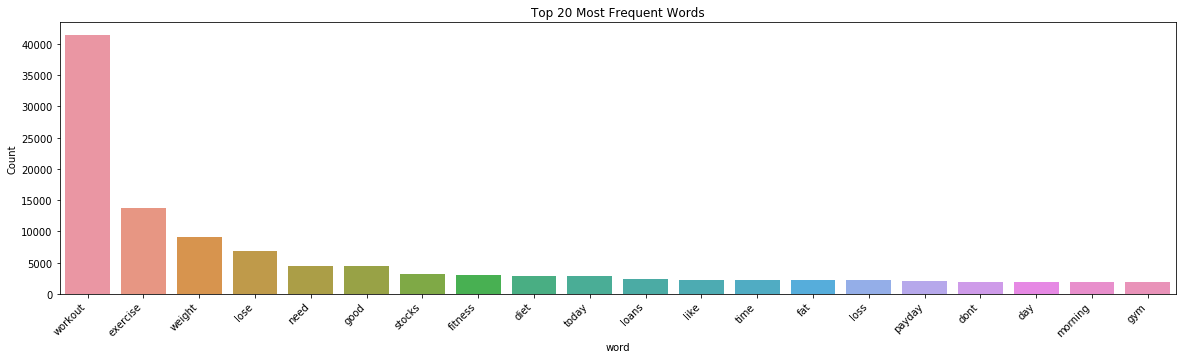

In [32]:
# Plot most frequent words
plt.figure(figsize=(20,5))
# rotate and right align group names
plt.xticks(rotation=45, ha='right')
ax = sns.barplot(data=counts, x= "word", y = "count")
ax.set(ylabel = 'Count')
ax.set(title = 'Top 20 Most Frequent Words')    
plt.show()

## Troll Amplification
Examining the troll "echo chamber". Are trolls retweeting or mentioning other trolls?

In [33]:
# read list of users created during EDA
users = pd.read_csv('../data/users_totals.csv', encoding='utf-8',low_memory=False)

userlist = users['author'].tolist()
lc_userlist = [x.lower() for x in userlist]
lc_userlist.sort()

amplify = cleaned_mentions_series[cleaned_mentions_series.isin(lc_userlist)]

print(amplify.shape[0])

# Get counts of amplified troll tweets
amp_counts = amplify.value_counts()
print("There are",(amplify.shape[0]), "trolls in the echo chamber.")

0
There are 0 trolls in the echo chamber.


### Normalization
3 distinct steps:  
* stemming  
* lemmatization  
* everything else

### Lemmatization

In [34]:
from textblob import Word
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['cleaned'].head()

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


132225                                  guide writing research paper apa style
132226                                                 classroom allergy worst
132227    dont come class next week going sick greatest college professor ever
132228    dont come class next week going sick greatest college professor ever
132229                                           idiot facebook getting called
Name: cleaned, dtype: object

### Tokenize

In [35]:
#create a list from df['cleaned']
content_notags = df['cleaned'].tolist()

# First, create a new column with the tokenized text
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
#df['tokenized_text'] = df['content'].apply(tt.tokenize)
# map tt.tokenize to 'content' list
documents = list(map(tt.tokenize, content_notags))

In [36]:
from collections import defaultdict

frequency = defaultdict(int)
for document in documents:
    for token in document:
        frequency[token] += 1

In [37]:
documents = [[token for token in document if frequency[token] > 10] for document in documents]
# create a dictionary using from gensim.corpora.Dictionary
dictionary = corpora.Dictionary(documents)
#Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples. 
corpus = [dictionary.doc2bow(document) for document in documents]

In [38]:
len(corpus)

121904

## LDA Model
Fit an LDA Model for the tweet topics

In [39]:
# comment out once model is trained.
# fit LDA model
tweet_topics = LdaMulticore(corpus=corpus,
                          id2word=dictionary,
                          num_topics=10,
                          passes=10,
                          workers=2)

In [40]:
# save/load model to/from disk

temp_file = datapath("model_right_troll_tweets")
tweet_topics.save(temp_file)

# Load a pretrained model from disk.
#tweet_topics = LdaMulticore.load("model")
# - or -
#m1 = LdaMulticore.load(datapath("lda_3_0_1_model"))

In [41]:
# print out first 10 topics
for i, topic in enumerate(tweet_topics.print_topics(10)):
    print('{} --- {}'.format(i, topic))

0 --- (0, '0.294*"workout" + 0.059*"minute" + 0.033*"good" + 0.023*"today" + 0.017*"day" + 0.016*"need" + 0.014*"morning" + 0.013*"time" + 0.012*"great" + 0.011*"got"')
1 --- (1, '0.100*"workout" + 0.026*"come" + 0.021*"late" + 0.018*"preworkout" + 0.017*"music" + 0.016*"taylor" + 0.016*"night" + 0.014*"starting" + 0.014*"mark" + 0.014*"clothes"')
2 --- (2, '0.012*"jessica" + 0.010*"katie" + 0.010*"matt" + 0.010*"amanda" + 0.009*"queen" + 0.009*"laura" + 0.009*"rachel" + 0.008*"andrew" + 0.008*"stephanie" + 0.007*"anthony"')
3 --- (3, '0.034*"lil" + 0.033*"sarah" + 0.023*"david" + 0.020*"stock" + 0.019*"lauren" + 0.014*"jordan" + 0.013*"free" + 0.012*"anna" + 0.011*"fit" + 0.011*"alexis"')
4 --- (4, '0.041*"partner" + 0.033*"sore" + 0.033*"buddy" + 0.029*"chris" + 0.027*"john" + 0.022*"ryan" + 0.021*"mike" + 0.019*"miss" + 0.017*"nicole" + 0.016*"must"')
5 --- (5, '0.222*"loan" + 0.198*"payday" + 0.126*"online" + 0.111*"24x7" + 0.099*"approved" + 0.026*"cash" + 0.012*"credit" + 0.008*"

### Wordcloud
Crate a basic word cloud of the topic groupings

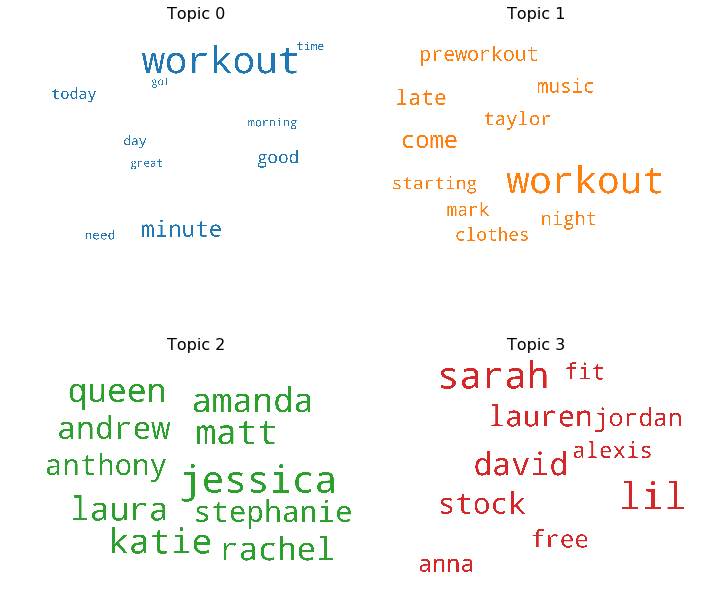

In [42]:
#Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = tweet_topics.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Use pyLDAvis library to Visualize Topics

In [43]:
## Try the pyLDAvis visualization
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [44]:
# http://tlfvincent.github.io/2015/10/23/presidential-speech-topics/#topic=1&lambda=1&term=
vis_data = gensimvis.prepare(tweet_topics, corpus, dictionary)
pyLDAvis.display(vis_data)

### Output Visualization Tool to HTML

In [45]:
# save viz output to an HTML file
vis_data = gensimvis.prepare(tweet_topics, corpus, dictionary)

pyLDAvis.save_html(vis_data, 'pyLDAviz_Commercial.html')